In [19]:
import json
import matplotlib.pyplot as plt
import pandas as pd

obj1024 = json.load(open('results_1024.json'))
obj2048 = json.load(open('results_2048.json'))
obj4096 = json.load(open('results_4096.json'))

In [20]:
end_lcs = {
    '1024': [row["end_lc"] for row in obj1024],
    '2048': [row["end_lc"] for row in obj2048],
    '4096': [row["end_lc"] for row in obj4096],
}

In [21]:
number_of_participants = {
    '1024': [len(row["participants"]) for row in obj1024],
    '2048': [len(row["participants"]) for row in obj2048],
    '4096': [len(row["participants"]) for row in obj4096],
}

In [22]:
round_times = {
    '1024': [float(row["time_per_round"].split()[0]) for row in obj1024],
    '2048': [float(row["time_per_round"].split()[0]) for row in obj2048],
    '4096': [float(row["time_per_round"].split()[0]) for row in obj4096],
}

Text(0.5, 1.0, 'Lamport Counters at the end of each round')

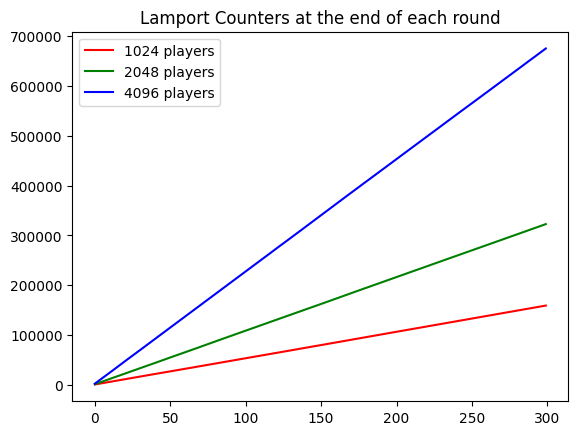

In [23]:
# plot end_lcs
plt.figure()
plt.plot(end_lcs['1024'], label='1024 players', color='red')
plt.plot(end_lcs['2048'], label='2048 players', color='green')
plt.plot(end_lcs['4096'], label='4096 players', color='blue')
plt.legend()
plt.title('Lamport Counters at the end of each round')

Text(0.5, 1.0, 'Number of participants in each round')

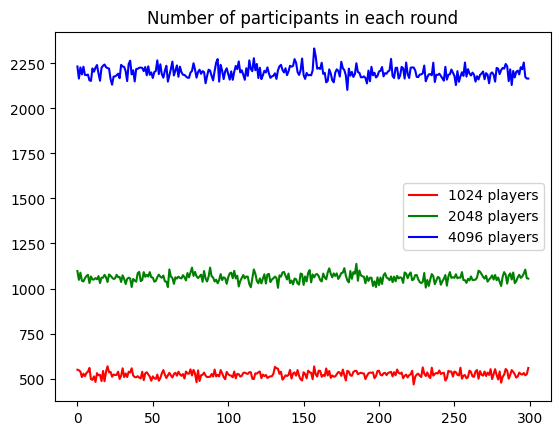

In [24]:
# plot number_of_participants
plt.figure()
plt.plot(number_of_participants['1024'], label='1024 players', color='red')
plt.plot(number_of_participants['2048'], label='2048 players', color='green')
plt.plot(number_of_participants['4096'], label='4096 players', color='blue')
plt.legend()
plt.title('Number of participants in each round')

In [25]:
print(sum(number_of_participants['1024'])/len(number_of_participants['1024']))
print(sum(number_of_participants['2048'])/len(number_of_participants['2048']))
print(sum(number_of_participants['4096'])/len(number_of_participants['4096']))

522.9166666666666
1059.97
2200.4666666666667


Text(0.5, 1.0, 'Time per round')

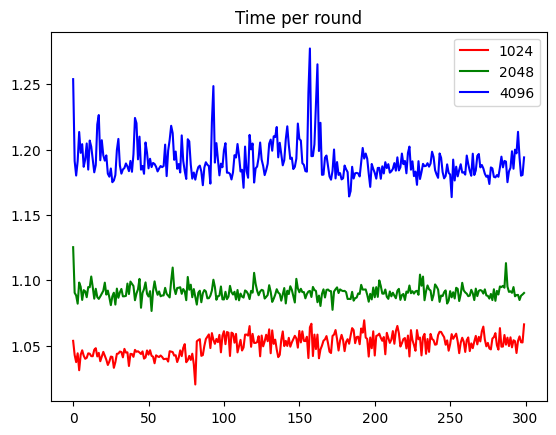

In [26]:
# plot time_per_round
plt.figure()
plt.plot(round_times['1024'], label='1024', color='red')
plt.plot(round_times['2048'], label='2048', color='green')
plt.plot(round_times['4096'], label='4096', color='blue')
plt.legend()
plt.title('Time per round')

In [30]:
import json
obj1024 = json.load(open('results_2048.json'))

In [31]:
total = {}
for row in obj1024:
    participations_4096 = {}
    for p in row['participants']:
        lc, player, roll = p
        if player not in participations_4096:
            participations_4096[player] = 0
        participations_4096[player] += 1
    for k, v in participations_4096.items():
        if v == 2:
            print(row)
            print(k, v)
            break
        if k not in total:
            total[k] = {0: 0, 1: 0, 2: 0}
        total[k][v] += 1
a = []
for k, v in total.items():
    if v[2] > 0:
        print(k, v)
    